<a href="https://colab.research.google.com/github/Anzaliyadav321/LGMVIP--DataScience-Task-Number/blob/main/Task_2_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Prediction And Forecasting Using Stacked LSTM

Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  loading training data
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)

In [3]:
#keras only take numpy array
training_set = data.iloc[:, 1:2].values

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.shape

(2035, 8)

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
data1 = data.sort_values(by='Date')
data1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
data1.reset_index(inplace=True) 

data1.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


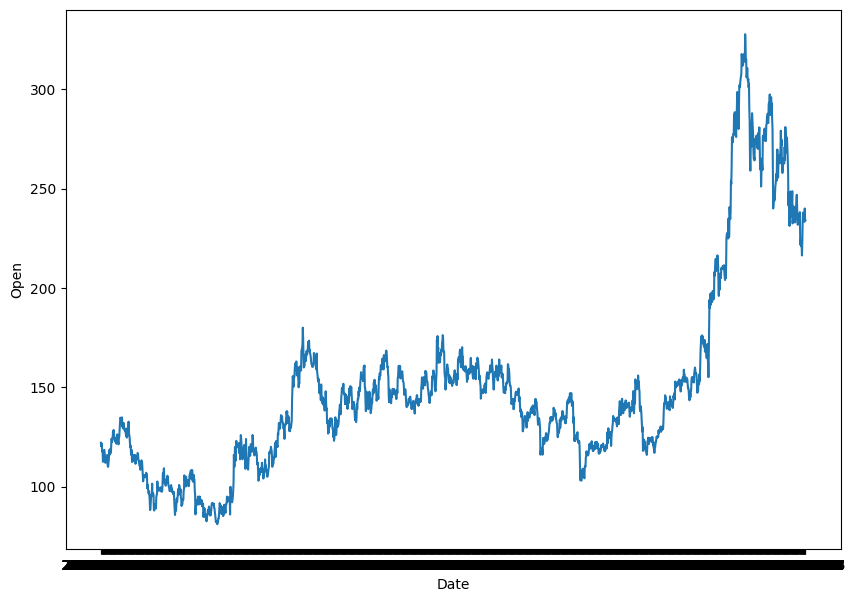

In [10]:
plt.figure(figsize=(10,7))
plt.plot(data1['Date'], data1['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [11]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(training_set) #training set scaled


In [12]:
print(len(data1))

2035


In [13]:
#creating the train data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,2035):
  X_train.append(data1[i-60:i, 0])
  y_train.append(data1[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
# Data reshaping
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Model Building

In [16]:
model = Sequential()

# add 1st lstm layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

# add 2nd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate=0.2))

#  add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate=0.2))

#  add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(units = 1))


Model compiling

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

Model fitting

In [19]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
62/62 [==============================] - 18s 146ms/step - loss: 0.0081
Epoch 2/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0025
Epoch 4/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 9s 143ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 9s 140ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 11s 167ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0020
Epoch 13/10

 For  Prediction

In [20]:
# loading testing data
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv"
data_test = pd.read_csv(url)

In [21]:
real_stock_price = data_test.iloc[:, 1:2]

In [22]:
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)

In [23]:
inputs = data_total[len(data_total)-len(data_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs =scaler.transform(inputs) 

In [24]:
print(len(inputs))

76


In [25]:
# creating the test data structure

X_test = []
for i in range(60,76):
  X_test.append(inputs[i-60:i, 0])
  
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))

In [26]:
predicted_stock_price = model.predict(X_test) #scaled values of prediction

1/1 [==============================] - 2s 2s/step


In [27]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)#reversing the prediction

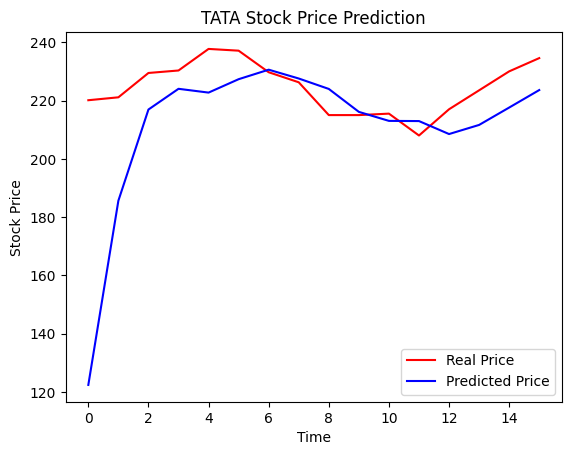

In [28]:
plt.plot(real_stock_price, color='red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()